In [2]:
from Pycram_ADs.ad_updater.src.sv_graph import *

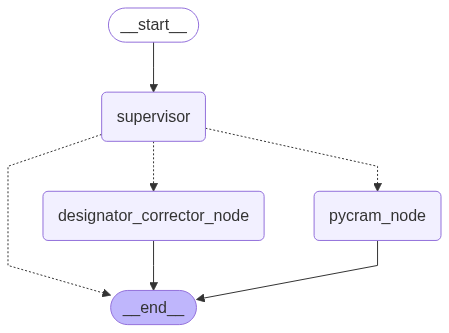

In [3]:
from IPython.display import display, Image
display(Image(sv_grapher.get_graph().draw_mermaid_png()))

In [4]:
test_obj = Object(name="cup",concept="cup", color="blue")
test_robot = Object(name="robot", concept="robot")
test_links = [Link(name="gripper_link"), Link(name="wrist_link")]
test_pose = PoseStamped(pose=Pose(
    position=Vector3(x=1.0, y=2.0, z=3.0),
    orientation=Quaternion(x=0.0, y=0.0, z=0.0, w=1.0)))

action_designator = ("PickUpAction(object_designator=Object(name='Cup',concept='Cup', color='blue'), arm=Arms.LEFT, "
                         "grasp_description=GraspDescription(approach_direction=Grasp.TOP,vertical_alignment=Grasp.TOP, rotate_gripper=True))")
grasping_error = ("ObjectNotGraspedErrorModel(obj=Object(name='cup',concept='Cup', color='blue'), "
                  "robot=Object(name='robot', concept='robot'), arm=Arms.LEFT, grasp=Grasp.TOP)")
human_comment = "pick up the yellow cup not the blue cup"

place_designator = """PlaceAction(object_designator=Object(name='Cup',concept='Cup', color='blue'), target_location= PoseStamped(pose=Pose(position=Vector3(x=1.0, y=2.0, z=3.0),
orientation=Quaternion(x=0.0, y=0.0, z=0.0, w=1.0))), arm=Arms.LEFT)"""
placing_error = """ObjectNotPlacedAtTargetLocation(object_designator=Object(name='Cup',concept='Cup', color='blue'), target_location= PoseStamped(pose=Pose(
    position=Vector3(x=1.0, y=2.0, z=3.0),
    orientation=Quaternion(x=0.0, y=0.0, z=0.0, w=1.0))), robot = Object(name="robot", concept="robot"), arm=Arms.LEFT)"""
human_comment2 = "use the other arm"
config = {"configurable" : {"thread_id" : 1}}

In [5]:
for chunk in sv_grapher.stream({"instruction" : "pick the cup from the table"}, config = config,stream_mode="updates"):
    print(chunk)
    print('-'*10)

Next Worker: pycram_node
{'supervisor': None}
----------
INSIDE MODEL SELECTOR TOOL
The instruction is : pick the cup from the table
response of tool 1 :  <class 'Pycram_ADs.ad_updater.src.pycram_agent.ActionNames'> model_names=['PickUpAction']
INSIDE MODEL POPULATOR TOOL
The instruction is : pick the cup from the table
Model Names ['PickUpAction']
Successfully created instance of: PickUpAction
Context Schema 
PickUpAction : {'$defs': {'Arms': {'description': 'Enum for Arms.', 'enum': [0, 1, 2], 'title': 'Arms', 'type': 'integer'}, 'Grasp': {'enum': ['front', 'back', 'left', 'right', 'top', 'bottom'], 'title': 'Grasp', 'type': 'string'}, 'GraspDescription': {'description': 'Represents a grasp description with a side grasp, top face, and orientation alignment.', 'properties': {'approach_direction': {'$ref': '#/$defs/Grasp', 'description': 'The primary approach direction. Must be one of {Grasp.FRONT, Grasp.BACK, Grasp.LEFT, Grasp.RIGHT}.'}, 'vertical_alignment': {'anyOf': [{'$ref': '#/$d

In [9]:
sv_grapher.get_state(config=config).values['updated_action_designator']

"models=[PickUpAction(object_designator=Object(name='cup', concept='cup'), arm=Arms.LEFT, grasp_description=GraspDescription(approach_direction=Grasp.FRONT, rotate_gripper=False))]"

In [10]:
for chunk in sv_grapher.stream({"action_designator": action_designator, "reason_for_failure": grasping_error,
                                "human_comment" : human_comment}, config = config,stream_mode="updates"):
    print(chunk)
    print('-'*10)

Next Worker: designator_corrector_node
{'supervisor': None}
----------
INSIDE ANALYZER NODE
Pick up the blue cup
INSIDE CONTEXT NODE
INSIDE UPDATER NODE
Action Designator: PickUpAction(object_designator=Object(name='Cup',concept='Cup', color='blue'), arm=Arms.LEFT, grasp_description=GraspDescription(approach_direction=Grasp.TOP,vertical_alignment=Grasp.TOP, rotate_gripper=True))
Reason for Failure: ObjectNotGraspedErrorModel(obj=Object(name='cup',concept='Cup', color='blue'), robot=Object(name='robot', concept='robot'), arm=Arms.LEFT, grasp=Grasp.TOP)
Human Comment: pick up the yellow cup not the blue cup
Model Response: PickUpAction(object_designator=Object(name='Cup', concept='Cup', color='yellow'), arm=Arms.LEFT, grasp_description=GraspDescription(approach_direction=Grasp.TOP, vertical_alignment=Grasp.TOP, rotate_gripper=True))
{'designator_corrector_node': {'parameters_to_update': '["color"]', 'failure_reasons_solutions': '{"failure_reasons":["The action designator specified a blue

In [15]:
sv_grapher.get_state(config=config).values['human_instruction']['ad_instruction']

'Pick up the blue cup'

In [ ]:
# for s in sole.stream({"action_designator": HumanMessage(content=action_designator), "reason_for_failure": HumanMessage(content=grasping_error),
#              "human_comment": HumanMessage(content=human_comment)}, config = config, stream_mode="updates"):
#     print(s)
#     print("--------------")

In [ ]:
sole.invoke({"action_designator": place_designator, "reason_for_failure": placing_error,
             "human_comment" : human_comment2}, config = config, stream_mode="updates")

### State Info

In [ ]:
eval(sole.get_state(config).values["failure_reasons_solutions"])

In [ ]:
sole.get_state(config).values["parameters_to_update"]

In [ ]:
eval(sole.get_state(config).values["update_parameters_reasons"])

In [ ]:
sole.get_state(config).values["updated_parameters"]

In [ ]:
sole.get_state(config).values["action_designator"]

In [ ]:
sole.get_state(config).values["updated_action_designator"]

In [ ]:
type(sole.get_state(config).values["updated_action_designator"])

In [ ]:
up_ad = sole.get_state(config).values["updated_action_designator"]

In [ ]:
up_ad.model_dump_json(exclude_none=True)

In [ ]:
str(up_ad)

In [ ]:
PlaceAction.model_validate_json(up_ad.model_dump_json(exclude_none=True))

### delete

In [ ]:
parameters_to_update = "object_designator.name should be changed from 'cup' to 'bottle', and object_designator.color should be changed from 'blue' to 'yellow'."
update_reason = """
Okay, let's tackle this problem. The user wanted to pick up the yellow bottle, but the action failed because it tried to pick up the blue cup instead. So, the main issue is the object color mismatch.

Looking at the action designator, the object_designator has the cup with color 'blue'. The user specified a yellow bottle. So, the color parameter in the object_designator is incorrect. It should be 'yellow' instead of 'blue'. Also, the object name is 'cup', but the user mentioned a 'bottle', so maybe the name should be 'bottle' as well. However, the problem might be more about the color since the error message mentions the object not being grasped, which could be due to the color not matching the target.

Wait, the error is ObjectNotGraspedErrorModel, which might indicate that the robot couldn't grasp the object, possibly because it wasn't the right one. But the user's comment is about picking up the yellow bottle, not the blue cup. So the action designator's object_designator has the wrong color and possibly the wrong object name.

So, the parameters to change are the color from 'blue' to 'yellow' and the object name from 'cup' to 'bottle'. However, the original action_designator's object_designator has name='cup', so changing that to 'bottle' would align with the user's intention. Also, the color is 'blue' which needs to be 'yellow'.

Therefore, the parameters to modify are object_designator's name and color. The arm is left, which might not be an issue unless the robot's left arm can't reach, but the error is about the object not being grasped, so focusing on the object parameters.

So the answer should list changing the object_designator's name from 'cup' to 'bottle' and color from 'blue' to 'yellow'.
"""

In [ ]:
sole.invoke({"action_designator": action_designator, "reason_for_failure": grasping_error,
             "human_comment": human_comment}, config = config)

In [ ]:
sole.get_state(config).values["action_designator"]

In [ ]:
sole.get_state(config).values["updated_action_designator"]